<a href="https://colab.research.google.com/github/kevinliao2003/projects/blob/main/Covid19Impacts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Market Comparator: Studying the effects of COVID-19 in Different companies**

**Team members:** Kevin Liao, Abdul Azizi, Talal Brek, Faadil Shaikh

# **Introduction**

COVID-19 had a massive impact on our lives, undeniably so, and as such, these impacts spread to many parts of daily life, including the way we interact with money. Due to quarantine, there were unparalleled shifts in the way we pay and manage our finances, given that there was a major blow to the global economy. Many alternatives to traditional payment methods began to spring, like cryptocurrencies, and some began to speculate that these new methods were coming on equal grounds to traditional methods. This is the belief that we want to try and test in this tutorial.

The hypothesis that we wish to evaluate is whether or not COVID-19 allowed cryptocurrencies (e.g. Etherium, Bitcoin) to be on similar footing with traditional payment methods (e.g. VISA, Mastercard, Paypal). To do so, we shall analyze correlations before and after the COVID-19 pandemic and show how to  come up with a hypothetical conclusion as to what the correlations would be if the pandemic did not exist in the first place.

This tutorial will demonstrate the entire data science lifecycle from data collection to analysis and hypothesis testing as we illustrate how Financial Payment technologies changed in the advent of COVID-19. The tutorial will also demonstrate how machine learning models can be used to predict trends in hypothetical situations such as if COVID-19 didn't exist.



**Data Sources:**
The datasets used for this project were sourced from Kaggle.

Datasets for datasets were sourced from:
https://www.kaggle.com/datasets/kapturovalexander/bitcoin-and-ethereum-prices-from-start-to-2023


 For convenience, we loaded the kaggle datasets onto the following github link. You can view them here:
 https://github.com/TBCode523/CMSC320-Data_Sets/tree/main/datasets

To narrow down the list of Financial Tech companies, we used information from the following wikipedia article on S&P 500 companies: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies


# **Data Collection**

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as sms
import pandas as pd
import seaborn
import numpy as np
import requests
import io
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import math
from sklearn.model_selection import cross_validate
import time
from datetime import datetime
from sklearn.decomposition import PCA


First, we will load our Bitcoin, Ethereum, and Paypal datasets from the host github. For each company, we will collect data from the github link and plot out the Price per Coin (or in the case of Paypal, Price per Share).

In [ ]:
#BTC DATASET

url = 'https://raw.githubusercontent.com/TBCode523/CMSC320-Data_Sets/main/datasets/Bitcoin%20prices.csv'

btc_df = pd.read_csv(url)
unixlst = []
for i in btc_df['Date']:
  date = datetime.strptime(i, '%Y-%m-%d')
  unixlst.append((time.mktime(date.timetuple())))
btc_df['unix'] = unixlst
btc_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,unix
3120,2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,15284538859,1.680566e+09
3121,2023-04-05,28169.726563,28739.238281,27843.763672,28177.984375,28177.984375,17052315986,1.680653e+09
3122,2023-04-06,28175.226563,28178.384766,27738.759766,28044.140625,28044.140625,13837809380,1.680739e+09
3123,2023-04-07,28038.966797,28111.593750,27794.031250,27925.859375,27925.859375,10861680497,1.680826e+09
3124,2023-04-08,27923.234375,28158.269531,27887.365234,28032.187500,28032.187500,9243753472,1.680912e+09


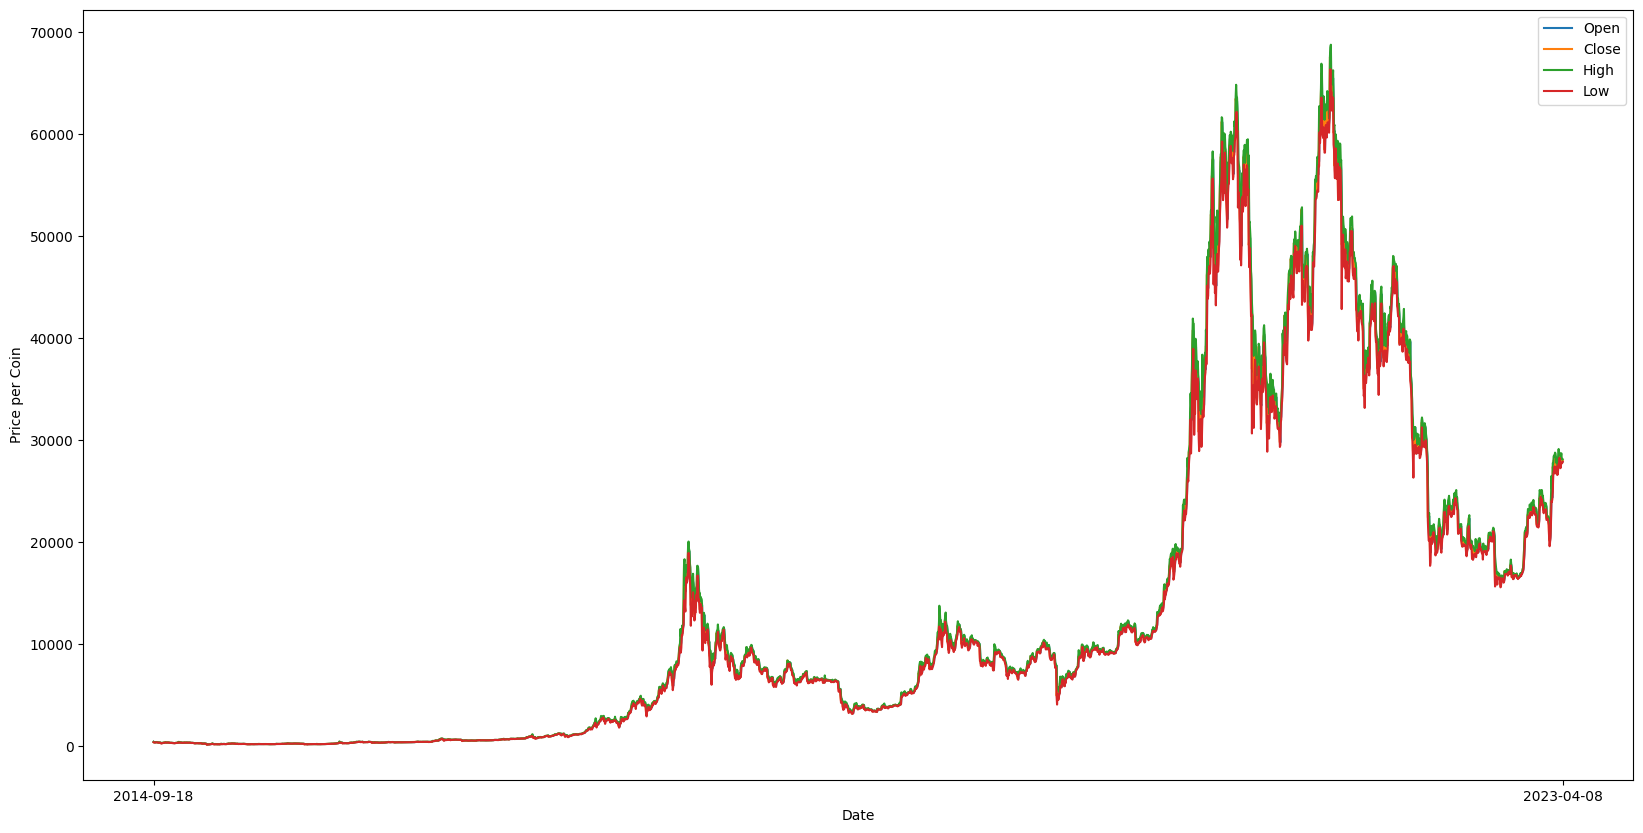

,Date,Open,High,Low,Close,Adj Close,Volume,unix
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,1.410998e+09
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,1.411085e+09
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,1.411171e+09
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,1.411258e+09
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,1.411344e+09


In [ ]:
dateslst = btc_df['Date'].to_list()
#print(dateslst)
plt.plot(dateslst, btc_df[['Open', 'Close', 'High', 'Low']],)
plt.legend(['Open', 'Close', 'High', 'Low'], fontsize=10)
plt.xlabel('Date')
plt.ylabel('Price per Coin')
plt.xticks([dateslst[0], dateslst[-1]], visible=True, rotation="horizontal")
plt.show()
btc_df.head()

Here, we will repeat the data collection steps for Ethereum.

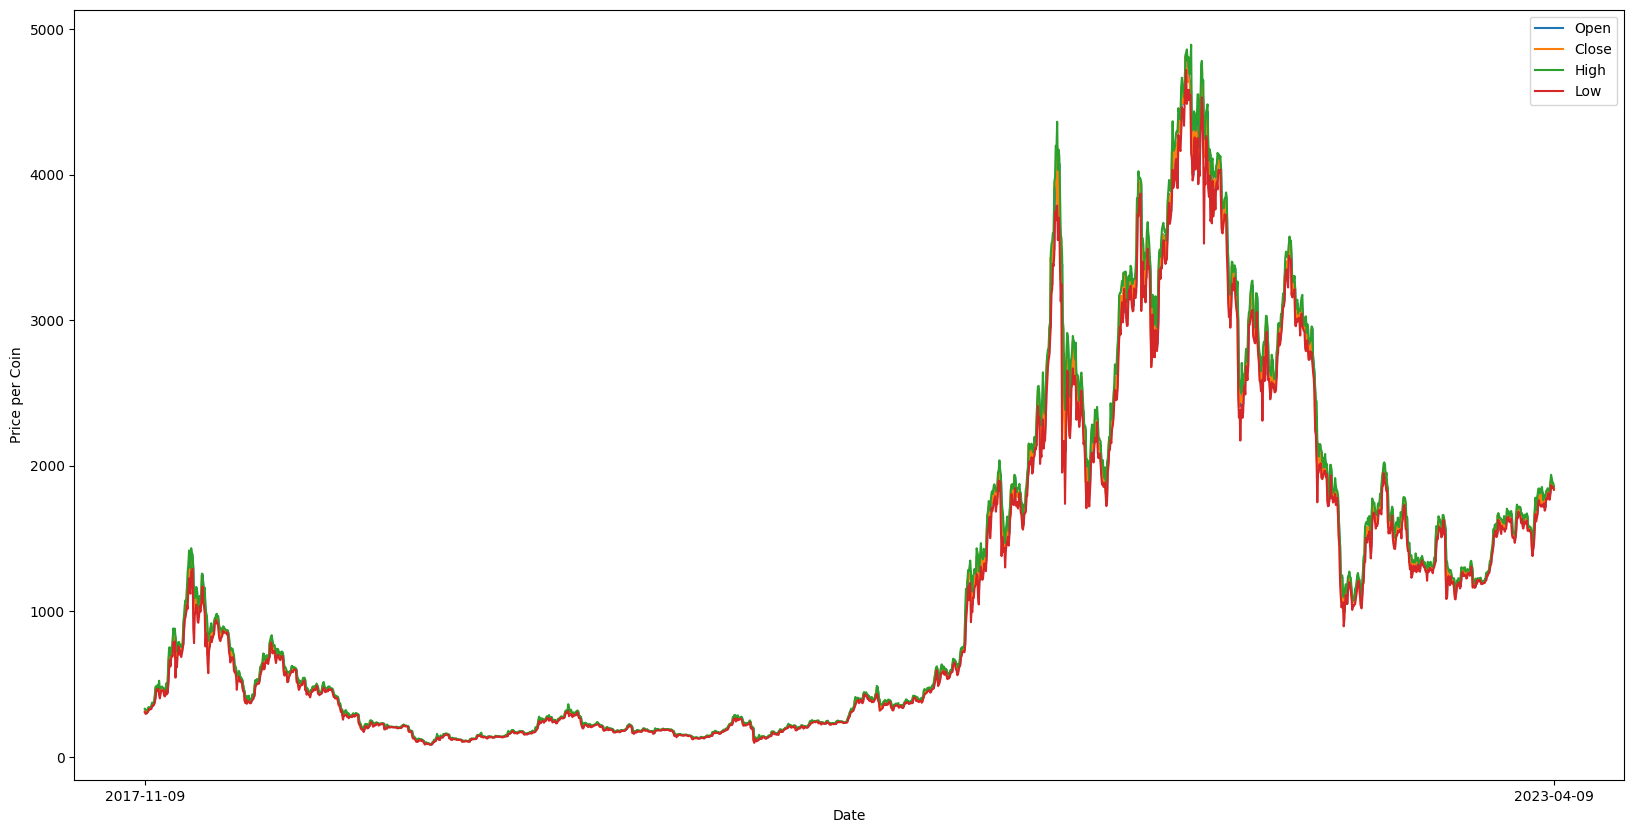

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [ ]:
#Eth dataset
url = 'https://raw.githubusercontent.com/TBCode523/CMSC320-Data_Sets/main/datasets/Ethereum%20prices.csv'

eth_df = pd.read_csv(url)

dateslst = eth_df['Date'].to_list()

plt.xlabel('Date')
plt.ylabel('Price per Coin')
ax= plt.plot(dateslst, eth_df[['Open', 'Close', 'High', 'Low']],)
plt.xticks([dateslst[0], dateslst[-1]], visible=True, rotation="horizontal")
plt.legend(['Open', 'Close', 'High', 'Low'], fontsize=10)

plt.show()

eth_df.head()

We can already observe that Ethereum and Bitcoin share some peaks in price despite being valued at different amounts.

**Loading Paypal:**

Despite being classified as a financial tech company, we will collect information for Paypal from the github in the same way that we collected the crypto datasets.


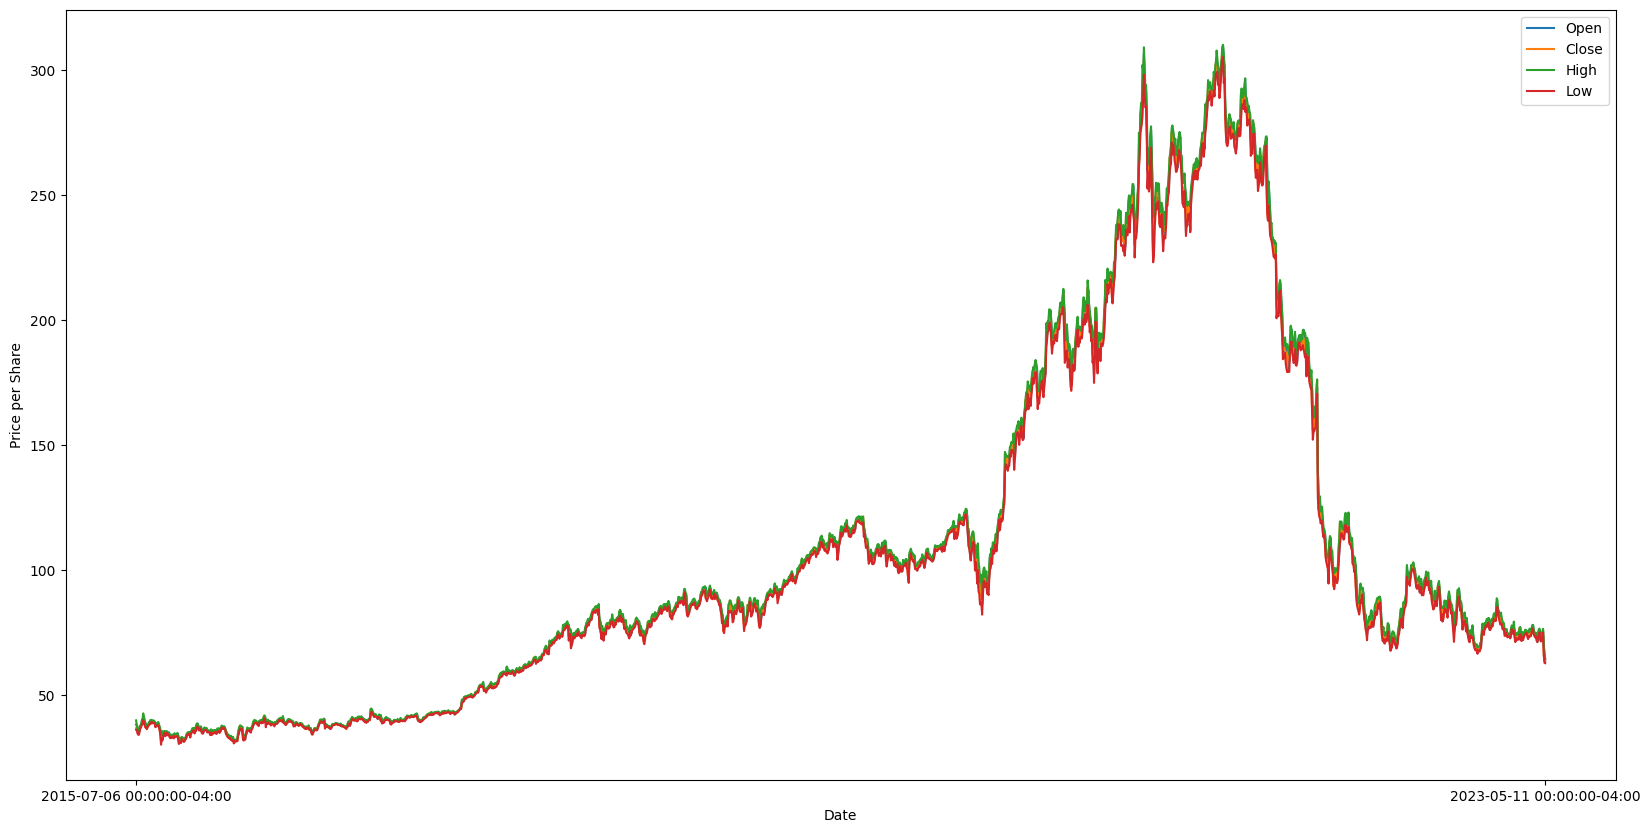

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-07-06 00:00:00-04:00,38.000000,39.750000,36.000000,36.709999,5866600,0.0,0.0
1,2015-07-07 00:00:00-04:00,37.720001,37.810001,36.000000,36.619999,7359000,0.0,0.0
2,2015-07-08 00:00:00-04:00,36.340000,36.360001,34.529999,34.700001,5387700,0.0,0.0
3,2015-07-09 00:00:00-04:00,35.099998,35.520000,33.990002,34.500000,3760100,0.0,0.0
4,2015-07-10 00:00:00-04:00,34.660000,35.189999,33.980000,34.689999,4472800,0.0,0.0


In [ ]:
#Paypal dataset
url = 'https://raw.githubusercontent.com/TBCode523/CMSC320-Data_Sets/main/datasets/PYPL.csv'

paypal_df = pd.read_csv(url)
dateslst = paypal_df['Date'].to_list()
plt.plot(dateslst, paypal_df[['Open', 'Close', 'High', 'Low']])
plt.legend(['Open', 'Close', 'High', 'Low'], fontsize=10)
plt.xlabel('Date')
plt.ylabel('Price per Share')
plt.xticks([dateslst[0], dateslst[-1]], visible=True, rotation="horizontal")
plt.show()
paypal_df.head()

Paypal also has a peak in price per share around 2021. We will analyze this trend more later in the tutorial.

Additionally, for each of the three companies collected so far, we observed that the open, closing, high, and low values for shares/prices throughout the day remain close together. As a result, for simplicity, we will focus on one column for the rest of the tutorial, **closing price.** More information about closing price can be found [here.](https://www.investor.gov/introduction-investing/investing-basics/glossary/closing-price)

**Loading Financial Tech Companies:**

Before downloading any more csv files from our github, we want to identify other Financial Tech companies. To do so, we collected information on the [S&P 500 companies](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)  using Beautiful Soup. Then, we will prettify the data to display it as a dataframe.

While the S&P company page has a wealth of information, we are only interested in companies related to Financial Technology (such as Visa and Mastercard). We can filter out the other companies by specifying the industry as "Transaction & Payment Services."

This will give us a dataframe to work with that is similar to our Bitcoin, Ethereum, and Paypal dataframes.

In [ ]:
#S&P Finance Stocks
r = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
root = bs(r.content, "html")
sp500 = pd.read_html(root.find('table').prettify())[0]

fintech_df = sp500[sp500['GICS Sub-Industry'] == 'Transaction & Payment Processing Services']
fintech_df = fintech_df.reset_index()
fintech_df

,index,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,202,FIS,FIS,Financials,Transaction & Payment Processing Services,"Jacksonville, Florida",2006-11-10,1136893,1968
1,203,FISV,Fiserv,Financials,Transaction & Payment Processing Services,"Brookfield, Wisconsin",2001-04-02,798354,1984
2,204,FLT,Fleetcor,Financials,Transaction & Payment Processing Services,"Atlanta, Georgia",2018-06-20,1175454,2000
3,225,GPN,Global Payments,Financials,Transaction & Payment Processing Services,"Atlanta, Georgia",2016-04-25,1123360,2000
4,267,JKHY,Jack Henry & Associates,Financials,Transaction & Payment Processing Services,"Monett, Missouri",2018-11-13,779152,1976
5,306,MA,Mastercard,Financials,Transaction & Payment Processing Services,"Harrison, New York",2008-07-18,1141391,1966
6,368,PYPL,PayPal,Financials,Transaction & Payment Processing Services,"San Jose, California",2015-07-20,1633917,1998
7,476,V,Visa Inc.,Financials,Transaction & Payment Processing Services,"San Francisco, California",2009-12-21,1403161,1958


When looking through the dataframe, we find that there is a lot of unncessaary data in the table (e.g. year founded, headquarters location). We will drop these respective columns. What's left is a dataframe of names of Financial Tech companies.

In [ ]:
#drop additional columns
fintech_df.drop(['index', 'GICS Sub-Industry', 'GICS  Sector', 'CIK', 'Founded', 'Headquarters Location'], axis = 1, inplace = True)
fintech_df
fintech_df[fintech_df['Symbol'] == 'FIS']['Security'][0]
stockMap = {}
for (idx, r) in fintech_df.iterrows():
  stockMap[r['Symbol']] = r['Security']
print(type(fintech_df['Symbol'][0]))
print(type(fintech_df['Security'][0]))
print(type(fintech_df['Date added'][0]))

fintech_df

<class 'str'>
<class 'str'>
<class 'str'>


,Symbol,Security,Date added
0,FIS,FIS,2006-11-10
1,FISV,Fiserv,2001-04-02
2,FLT,Fleetcor,2018-06-20
3,GPN,Global Payments,2016-04-25
4,JKHY,Jack Henry & Associates,2018-11-13
5,MA,Mastercard,2008-07-18
6,PYPL,PayPal,2015-07-20
7,V,Visa Inc.,2009-12-21


**Downloading CSVs for Financial Tech**
Using the previous list of companies, we can now download each respective csv file from https://www.kaggle.com/. Due to the bulk of companies, we have simplified this step and loaded the csv files from the same github used for our cryptocurrency datasets.

In [ ]:
def getName(stockMap, row):
  return stockMap[row['Symbol']]

url_common_head = 'https://raw.githubusercontent.com/TBCode523/CMSC320-Data_Sets/main/datasets/'
url_common_tail = '.csv'
fintech_stocks = pd.DataFrame()

#use the dataframe we compiled earlier to download each csv file based on the company name
print(stockMap['FIS'])
for i in range(fintech_df['Symbol'].size):

    data = pd.read_csv(url_common_head + fintech_df['Symbol'][i] + url_common_tail)
    data['Symbol'] = [fintech_df['Symbol'][i]]*data.shape[0]
    fintech_stocks = pd.concat([fintech_stocks, data], ignore_index=True)

print('{} {}'.format(fintech_stocks['Date'][1], fintech_stocks['Open'][0]))

fintech_stocks['Name'] = fintech_stocks.apply(lambda row: getName(stockMap, row), axis=1)

fintech_stocks.head()


FIS
2001-06-21 00:00:00-04:00 9.64583536005755


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Name
0,2001-06-20 00:00:00-04:00,9.645835,9.846790,9.605644,9.605644,11000,0.0,0.0,FIS,FIS
1,2001-06-21 00:00:00-04:00,9.846793,10.248703,9.846793,10.248703,39300,0.0,0.0,FIS,FIS
2,2001-06-22 00:00:00-04:00,10.248700,10.308986,10.248700,10.288891,33800,0.0,0.0,FIS,FIS
3,2001-06-25 00:00:00-04:00,10.409465,10.650611,10.409465,10.650611,9100,0.0,0.0,FIS,FIS
4,2001-06-26 00:00:00-04:00,10.650610,10.650610,10.509942,10.630515,109800,0.0,0.0,FIS,FIS


Now that we created a dataframe similar to Bitcoin, Ethereum, and Paypal, let's try plotting it out to see if a similar trend can be found.

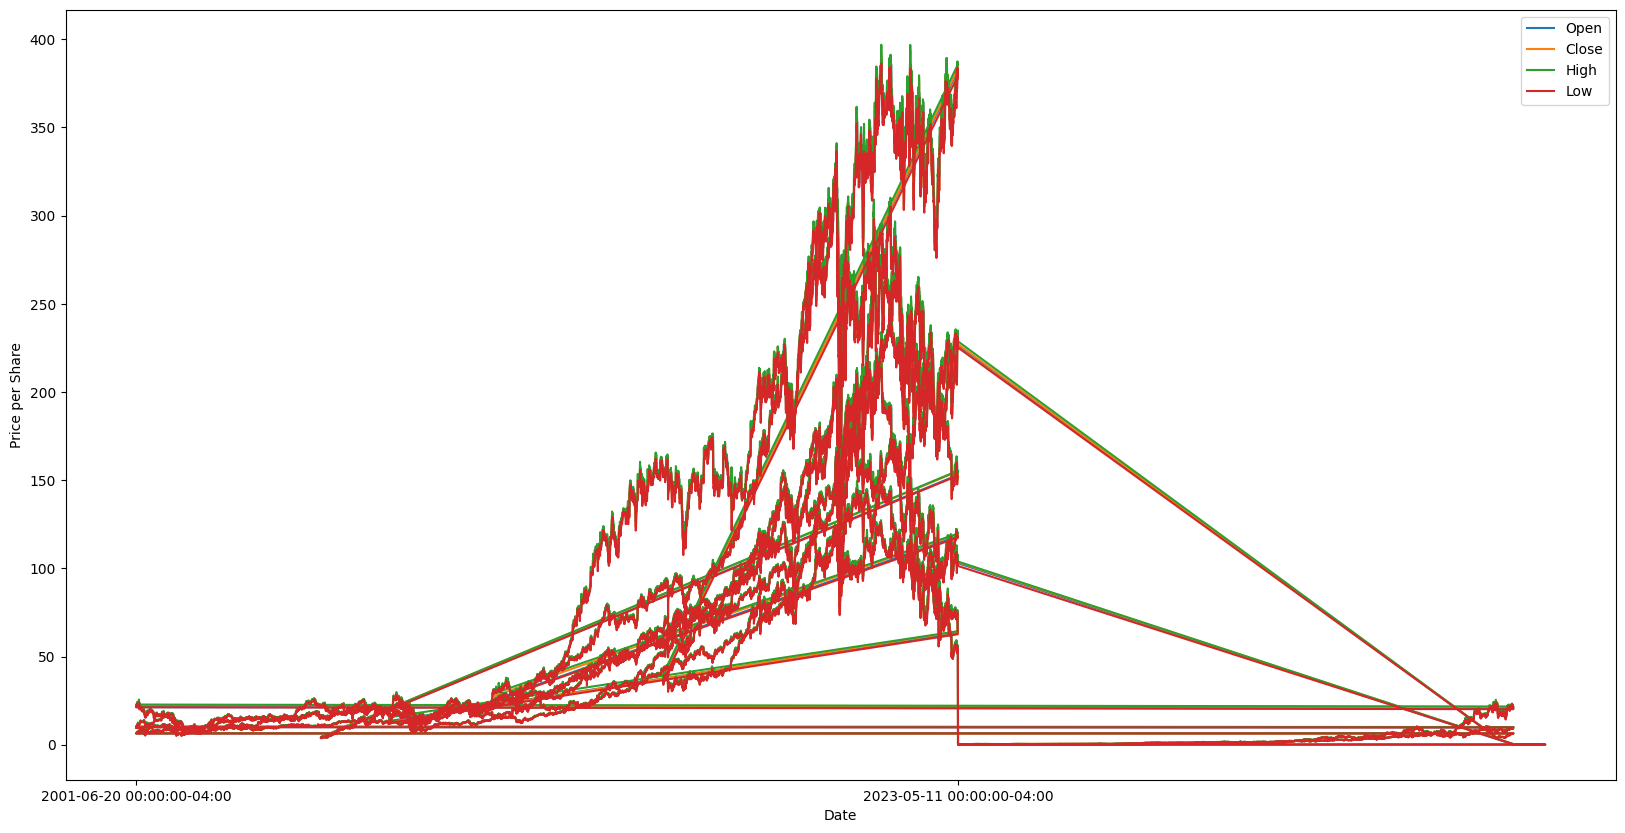

In [ ]:
dateslst = fintech_stocks['Date'].to_list()
plt.plot(dateslst, fintech_stocks[['Open', 'Close', 'High', 'Low']])
plt.legend(['Open', 'Close', 'High', 'Low'], fontsize=10)
plt.xlabel('Date')
plt.ylabel('Price per Share')
plt.xticks([dateslst[0], dateslst[-1]], visible=True, rotation="horizontal")
plt.show()


Unfortunately, this monstrosity will have to cleaned and trimmed in order to make meaningful observations!

# **Data Cleaning**


First, we will remove some more sections from the Financial Tech stock dataframe. Sections like "dividends" and "stock splits" aren't relevant to our observations.

In [ ]:
#Dividends, & stock splits doesn't seem very useful
fintech_stocks.drop(['Dividends', 'Stock Splits'],axis = 1, inplace = True)



Next, we will remove any "NaN" or invalid numbers in the datasets we have, and then convert to date-time objects. This step is important since it will help us when we want to sort based on time, or else date/time will be labeled as a column of strings.

In [ ]:
#remove any nans or undefined (eth data set)
eth_df.dropna(axis='rows')
paypal_df.dropna(axis='rows')
btc_df.dropna(axis='rows')

#convert Eth to datetime objects
eth_df.head()
dates = []
for i in eth_df['Date']:
  date = datetime.strptime(i, '%Y-%m-%d')
  #print(type(date))
  dates.append(date)
eth_df['date_time'] = dates
eth_df.drop('Date', axis = 1, inplace = True )
eth_df.head()



#convert to datetime object (Paypal)
dates = []
for element in paypal_df['Date']:
  #converts from string to datetime object
  date = datetime.strptime(element.split(' ')[0], '%Y-%m-%d')
  dates.append(date)
paypal_df['date_time'] = dates
paypal_df.drop('Date', axis = 1, inplace = True )
paypal_df.head()

#convert to datetime object (Bitcoin)
dates = []
for element in btc_df['Date']:
  #converts from string to datetime object
  date = datetime.strptime(element, '%Y-%m-%d')
  dates.append(date)
btc_df['date_time'] = dates
btc_df.drop(['Date', 'unix'], axis = 1, inplace = True )
btc_df['symbol'] = 'BTC'
btc_df.head()



,Open,High,Low,Close,Adj Close,Volume,date_time,symbol
0,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014-09-18,BTC
1,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014-09-19,BTC
2,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014-09-20,BTC
3,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014-09-21,BTC
4,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,2014-09-22,BTC


**Data Processing**

By now we have btc, eth, paypal, and fintech_stocks. This is getting difficult to keep track of, but we can merge the dataframes into a master dataframe for analysis.

In [ ]:
#Creating the master data-set
# we want dates that all datasets share
fintech_stocks.drop(['Open', 'High', 'Low', 'Name'],axis = 1, inplace = True  )
print(type(fintech_stocks['Date'].iloc[0]))
fintech_stocks.head()


<class 'str'>


,Date,Close,Volume,Symbol
0,2001-06-20 00:00:00-04:00,9.605644,11000,FIS
1,2001-06-21 00:00:00-04:00,10.248703,39300,FIS
2,2001-06-22 00:00:00-04:00,10.288891,33800,FIS
3,2001-06-25 00:00:00-04:00,10.650611,9100,FIS
4,2001-06-26 00:00:00-04:00,10.630515,109800,FIS


To make the master dataset, we add datetime objects to the fintech_stocks dataframe, converting the string to an object for easier graphing and comparing later.

We then reshape/melt the dataframe to get only the closing values of each company and make each company name the column header instead of a Symbol

In [ ]:
numStocks = len(fintech_stocks['Symbol'].unique())
latestDate = datetime.today()
dates = []
for element in fintech_stocks['Date']:
  #Finish updating fintech_stock dates to date-time objects before we merge
  date = datetime.strptime(element.split(' ')[0], '%Y-%m-%d')
  dates.append(date)
fintech_stocks.insert(0, 'date_time', dates)

dates = []
for i in fintech_stocks['Symbol'].unique():
  r = fintech_stocks[fintech_stocks['Symbol'] == i].iloc[0]
  dates.append(r['date_time'])
latest_start =  max(dates)



fintech_stocks = fintech_stocks[fintech_stocks['date_time'] >= latest_start]
fintech_stocksPrice = pd.pivot(fintech_stocks,index ='date_time', columns='Symbol', values='Close')

fintech_stocksPrice.insert(0, 'date_time', fintech_stocksPrice.index)

fintech_stocksPrice = fintech_stocksPrice.reset_index(drop=True)
fintech_stocksPrice.columns.name = None

fintech_stocksPrice.head()

,date_time,FIS,FISV,FLT,GPN,JKHY,MA,PYPL,V
0,2015-07-06,55.931908,42.154999,155.419998,51.058762,60.106636,89.989250,36.709999,64.613121
1,2015-07-07,56.092941,42.480000,154.320007,51.390812,60.234531,89.541039,36.619999,64.281120
2,2015-07-08,55.090958,41.705002,152.960007,50.687641,60.033562,88.205894,34.700001,63.294685
3,2015-07-09,55.761936,42.224998,153.610001,51.034348,60.261925,88.730423,34.500000,63.598225
4,2015-07-10,56.871277,43.174999,154.250000,51.737526,61.074921,90.237236,34.689999,64.897690


We repeat the above steps for the Volumes

In [ ]:
fintech_stocksVolume = pd.pivot(fintech_stocks,index ='date_time', columns='Symbol', values='Volume')
fintech_stocksVolume.insert(0, 'date_time', fintech_stocksVolume.index)

fintech_stocksVolume = fintech_stocksVolume.reset_index(drop=True)
fintech_stocksVolume.columns.name = None

fintech_stocksVolume.head()

,date_time,FIS,FISV,FLT,GPN,JKHY,MA,PYPL,V
0,2015-07-06,943300,1795200,515200,596200,650700,3042000,5866600,5270600
1,2015-07-07,728000,3218800,687300,1472200,331600,4859200,7359000,6500700
2,2015-07-08,832500,1771600,518100,1002000,548500,4367200,5387700,5973500
3,2015-07-09,884900,1949000,518200,706200,465300,2986000,3760100,4837800
4,2015-07-10,964100,2402400,451000,582000,329000,2721800,4472800,5110200


We now add in the Bitcoin and Ethereum Stock Closing values, similar to how we did above.

We also add a new value, ETF(exchange trading funds) Price, which is the average of all the traditional Fintech stocks. This will help simplify calculations later when making the model.

We save this for later use

In [ ]:
from functools import reduce
def rename(df, suffix):
  newNames = {}
  for i in df.columns:
    if i != 'date_time':
      newNames[i] = i + '_' + suffix
  return newNames
mstock_df = pd.DataFrame()
btc_trimmed = btc_df[['Close', 'date_time']].rename(columns = {'Close':'BTC'})

eth_trimmed = eth_df[['Close', 'date_time']].rename(columns = {'Close':'ETH'})

mstock_df = reduce(lambda  left,right: pd.merge(left,right,on=['date_time'],
                                            how='outer'), [fintech_stocksPrice, btc_trimmed, eth_trimmed])
mstock_df.dropna(axis = 0,inplace = True)
mstock_df['FINTECH_ETF'] = (mstock_df['FIS'] + mstock_df['FISV'] +mstock_df['FLT'] + mstock_df['GPN'] + mstock_df['JKHY'] + mstock_df['MA'] + mstock_df['PYPL'] + mstock_df['V'])/numStocks
mstock_df.rename(columns = rename(mstock_df, "Price"), inplace = True)

mstock_df.head()
mstock_saved = mstock_df

We repeat the above steps again, and this time we will create a dataframe for Stock Volumes

In [ ]:
mvol_df = pd.DataFrame()
btc_voltrimmed = btc_df[['Volume', 'date_time']].rename(columns = {'Volume':'BTC'})

eth_voltrimmed = eth_df[['Volume', 'date_time']].rename(columns = {'Volume':'ETH'})
mvol_df = reduce(lambda  left,right: pd.merge(left,right,on=['date_time'],
                                            how='outer'), [fintech_stocksVolume, btc_voltrimmed, eth_voltrimmed])
mvol_df['FINTECH_ETF'] = (mvol_df['FIS'] + mvol_df['FISV'] +mvol_df['FLT'] + mvol_df['GPN'] + mvol_df['JKHY'] + mvol_df['MA'] + mvol_df['PYPL'] + mvol_df['V'])/numStocks
mvol_df.dropna(axis = 0, inplace = True)
mvol_df.rename(columns = rename(mvol_df, "Volume"), inplace = True)
mvol_df

,date_time,FIS_Volume,FISV_Volume,FLT_Volume,GPN_Volume,JKHY_Volume,MA_Volume,PYPL_Volume,V_Volume,BTC_Volume,ETH_Volume,FINTECH_ETF_Volume
594,2017-11-09,2704700.0,1847200.0,822900.0,1781800.0,353000.0,2716400.0,8875500.0,4334700.0,3.226250e+09,8.932500e+08,2929525.0
595,2017-11-10,1800200.0,965400.0,970500.0,1142900.0,428500.0,1795900.0,5714600.0,4198900.0,5.208250e+09,8.859860e+08,2127112.5
596,2017-11-13,1561600.0,1387000.0,903100.0,1367100.0,350700.0,1750500.0,5843600.0,7185600.0,6.263250e+09,1.041890e+09,2543650.0
597,2017-11-14,2111000.0,1428600.0,528900.0,1072200.0,489100.0,3062300.0,6281500.0,5679600.0,3.197110e+09,1.069680e+09,2581650.0
598,2017-11-15,2414600.0,1989200.0,759000.0,1131300.0,334900.0,3058100.0,6232500.0,6895100.0,4.200880e+09,7.226660e+08,2851837.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1949,2023-03-31,7492400.0,3874100.0,561600.0,2111200.0,575100.0,3376600.0,8378600.0,9509000.0,1.900133e+10,9.149380e+09,4484825.0
1950,2023-04-03,5743700.0,3303300.0,451300.0,1454600.0,588300.0,2978000.0,8911700.0,6421500.0,1.955650e+10,9.643826e+09,3731550.0
1951,2023-04-04,6982400.0,2364700.0,443300.0,1914600.0,454300.0,2198700.0,8949100.0,5254700.0,1.528454e+10,1.039832e+10,3570225.0
1952,2023-04-05,6628100.0,2376600.0,555400.0,1753600.0,503700.0,2239600.0,10812700.0,4813600.0,1.705232e+10,1.031923e+10,3710412.5


### **Exploratory Analysis**

We will now graph out our two master dataframes for "price" and "volume"

Text(0.5, 1.0, 'Asset Price')

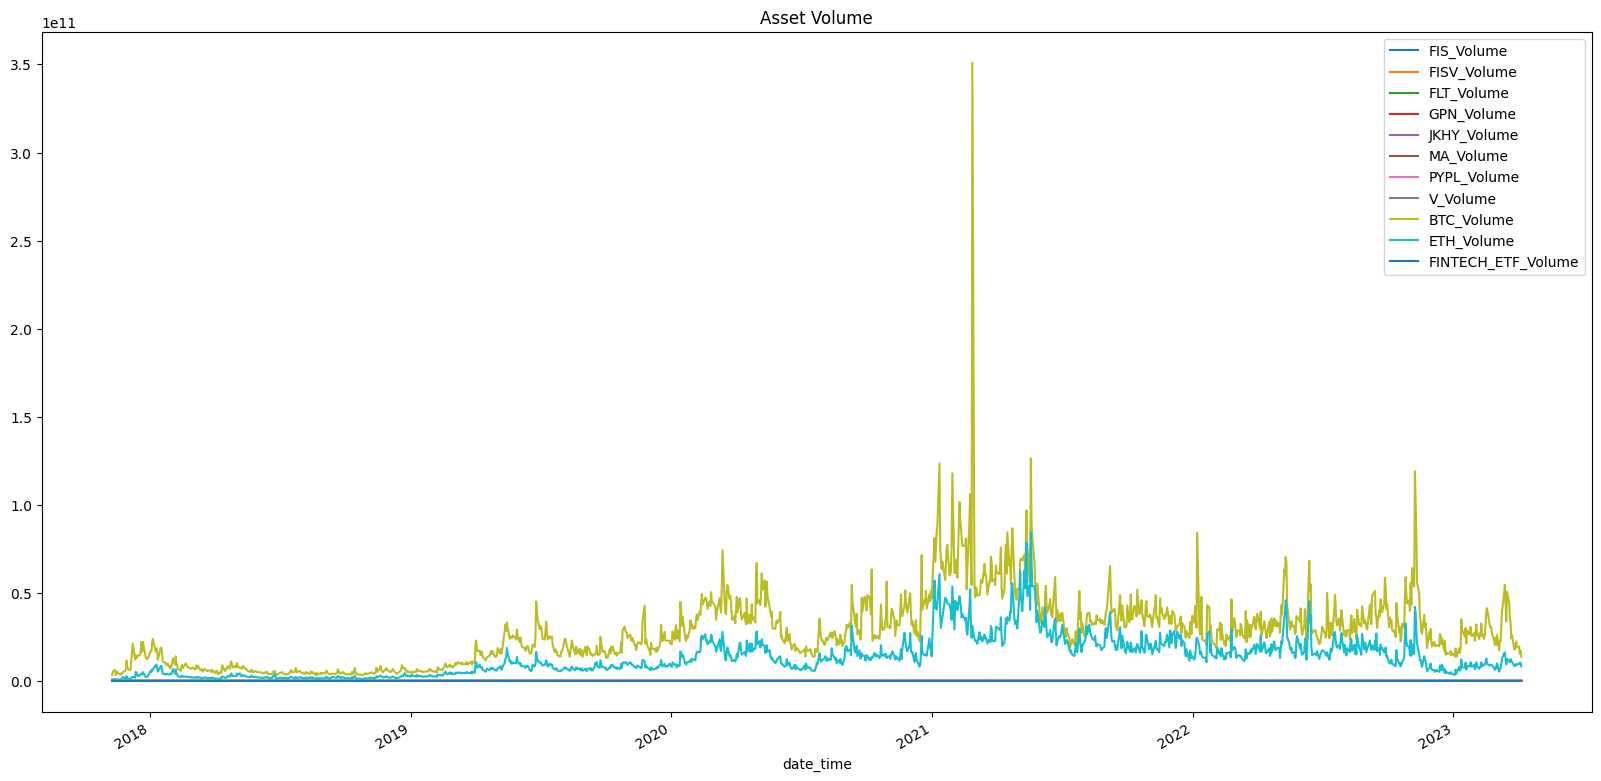

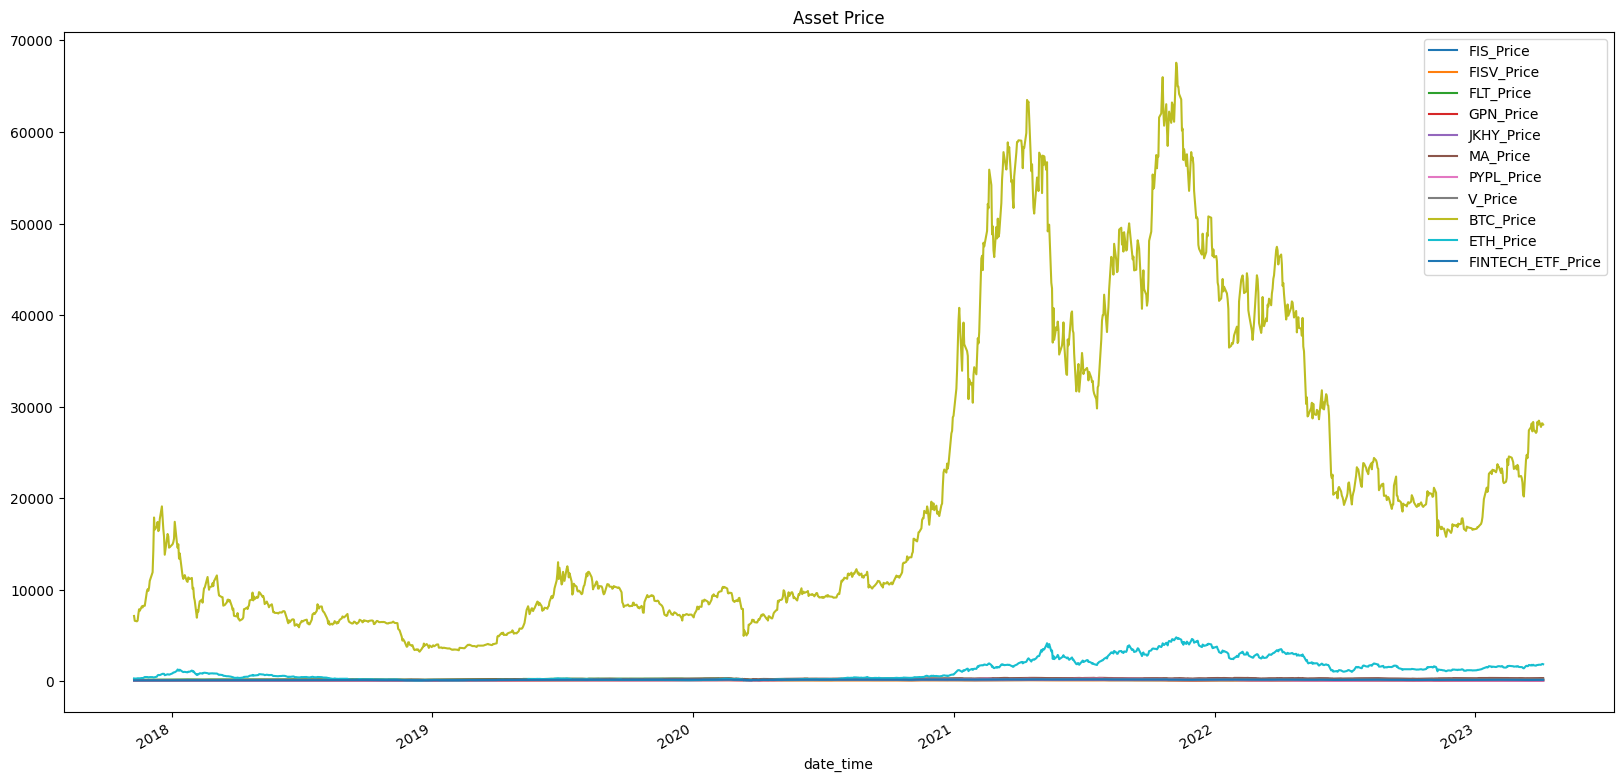

In [ ]:
#Plot price and volumes of each asset

mvol_df.plot(x = 'date_time', y= mvol_df.columns[1:])
plt.title("Asset Volume")
mstock_df.plot(x = 'date_time', y= mstock_df.columns[1:])
plt.title("Asset Price")


Yikes! It seems that Bitcoin price is way over the other stocks. Don't be fooled, this doesn't mean that it's the best asset for you. We can still see the rough ride this crypto has been over the past decade or so. In order to get a clearer picture, we ought to normalize and graph our assets in a piece meal fashion.

For this we'll use the sklearn libarary to normalize and see how our assets stack up to each other over the course of the last 5 years!

We hypotheisize that similar companies will have near identical patterns, what about you?

Text(0.5, 1.0, 'Normalized Price')

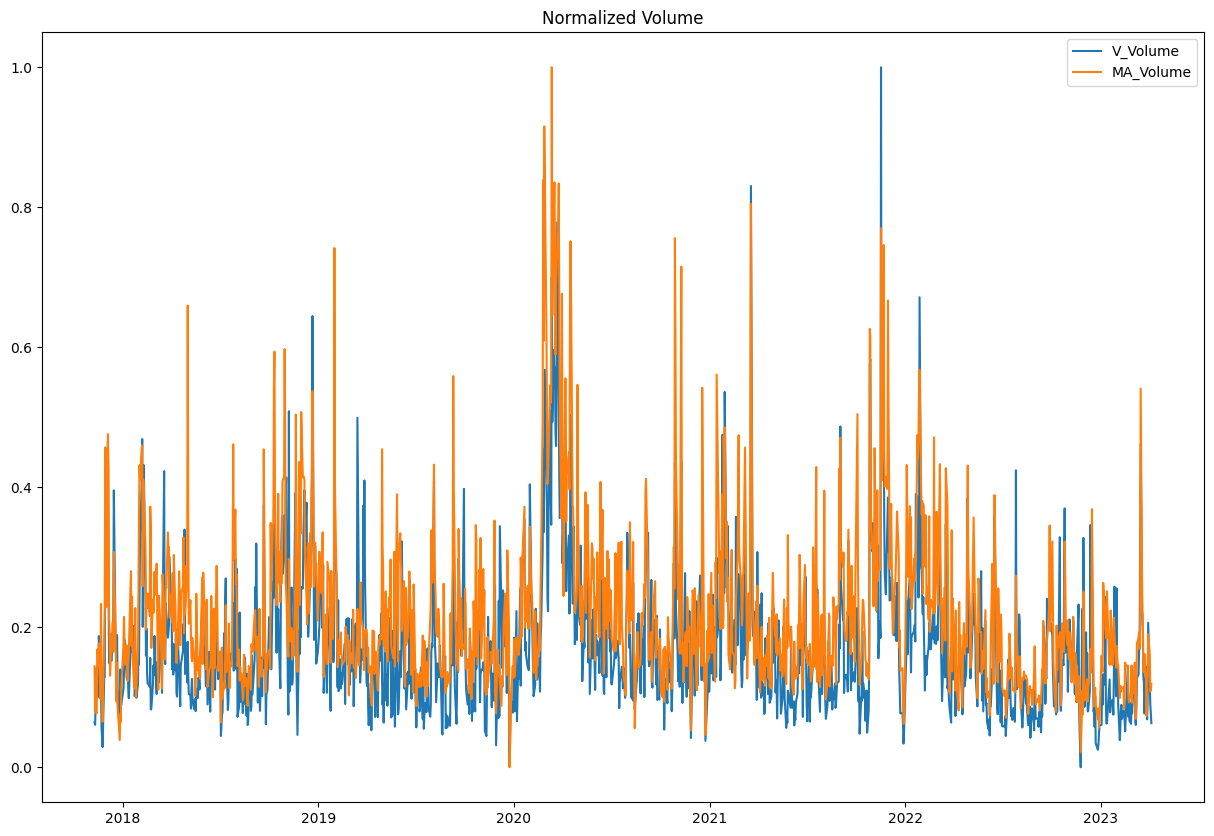

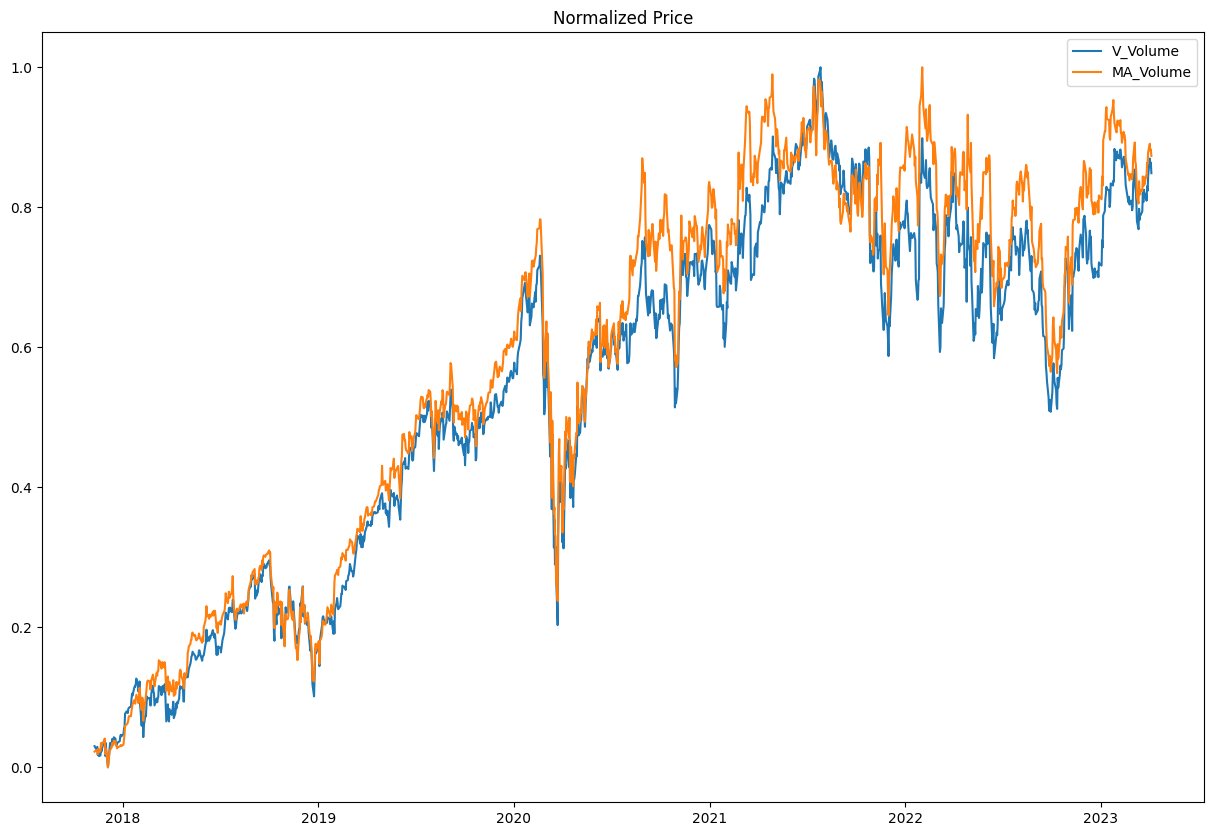

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data_vol=scaler.fit_transform(mvol_df.set_index('date_time')[['V_Volume', 'MA_Volume']])
plt.figure(figsize=(15,10))
plt.plot( mvol_df['date_time'], scaled_data_vol[:], label = ['V_Volume', 'MA_Volume'])
plt.title("Normalized Volume")
plt.legend()
scaled_data_price = scaler.fit_transform(mstock_df.set_index('date_time')[['V_Price', 'MA_Price']])
plt.figure(figsize=(15,10))
plt.plot(mstock_df['date_time'], scaled_data_price[:], label = ['V_Volume', 'MA_Volume'])
plt.legend()
plt.title("Normalized Price")

Our intuition held up for the two biggest financial companies. Let's see if the same holds true for the crypto-market!

array([[8.37907190e-05, 3.23769583e-03],
       [5.78294572e-03, 3.15107649e-03],
       [8.81655282e-03, 5.01014883e-03],
       ...,
       [3.47568794e-02, 1.16580632e-01],
       [3.98400461e-02, 1.15637518e-01],
       [3.05968713e-02, 9.11203355e-02]])

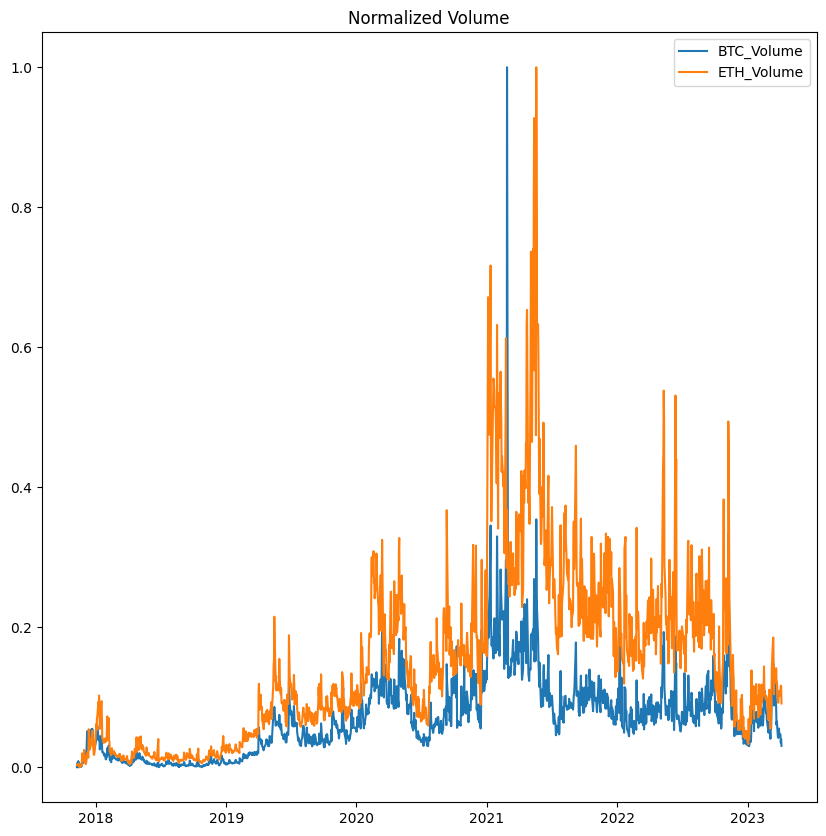

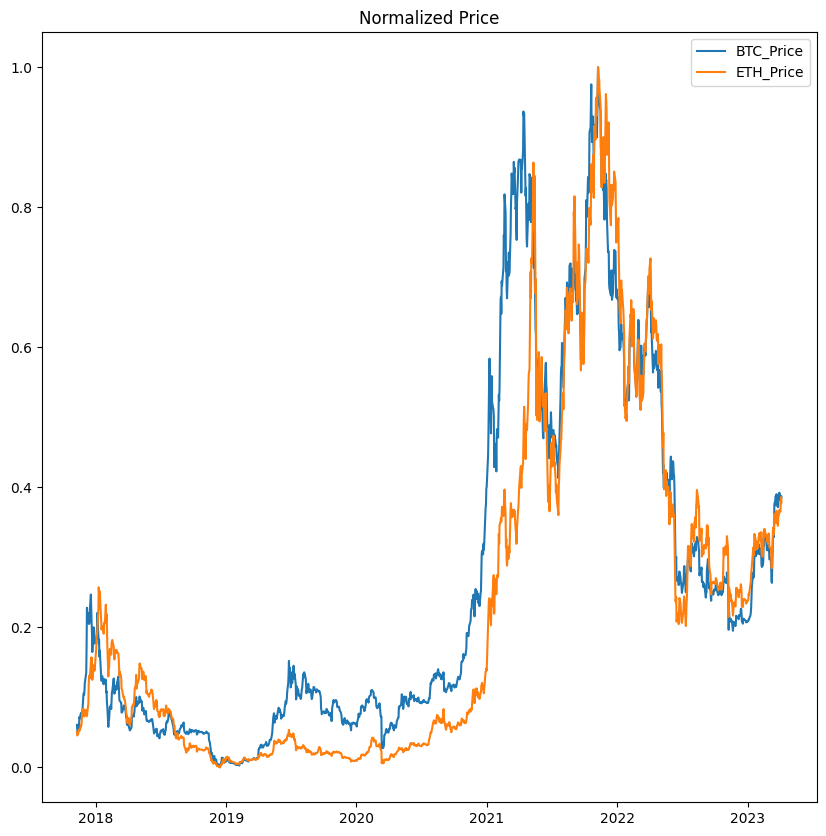

In [ ]:
scaled_data_vol=scaler.fit_transform(mvol_df.set_index('date_time')[['BTC_Volume', 'ETH_Volume']])
plt.figure(figsize=(10,10))
plt.plot( mvol_df['date_time'], scaled_data_vol[:], label = ['BTC_Volume', 'ETH_Volume'])
plt.title("Normalized Volume")
plt.legend()
scaled_data_price = scaler.fit_transform(mstock_df.set_index('date_time')[['BTC_Price', 'ETH_Price']])
plt.figure(figsize=(10,10))
plt.plot( mstock_df['date_time'], scaled_data_price[:], label = ['BTC_Price', 'ETH_Price'])
plt.title("Normalized Price")
plt.legend()
scaled_data_vol[:]

A couple key notes here. Despite the crypto-markets being available nearly 24/7 (unlike-traditional financial markets), there still appears to be some kind of lag time between Bitcoin and Ethereum. Perhaps it's due to the fact that the crypto-markets are not as organized as other markets, or ETH's liquidity is heavilty intertwined with Bitcoin. A more in-depth analysis has been done by our peers at Cointelegraph here: https://cointelegraph.com/news/truth-about-crypto-price-correlation-how-closely-does-eth-follow-btc

Let's see what happens when we normalize the values of a fintech company that offers the buying and selling of crypto-currencies to the actual crypto-currency itself!

array([[5.34647506e-02, 8.37907190e-05],
       [2.99783035e-02, 5.78294572e-03],
       [3.09368127e-02, 8.81655282e-03],
       ...,
       [5.40116210e-02, 3.47568794e-02],
       [6.78587351e-02, 3.98400461e-02],
       [6.57173215e-02, 3.05968713e-02]])

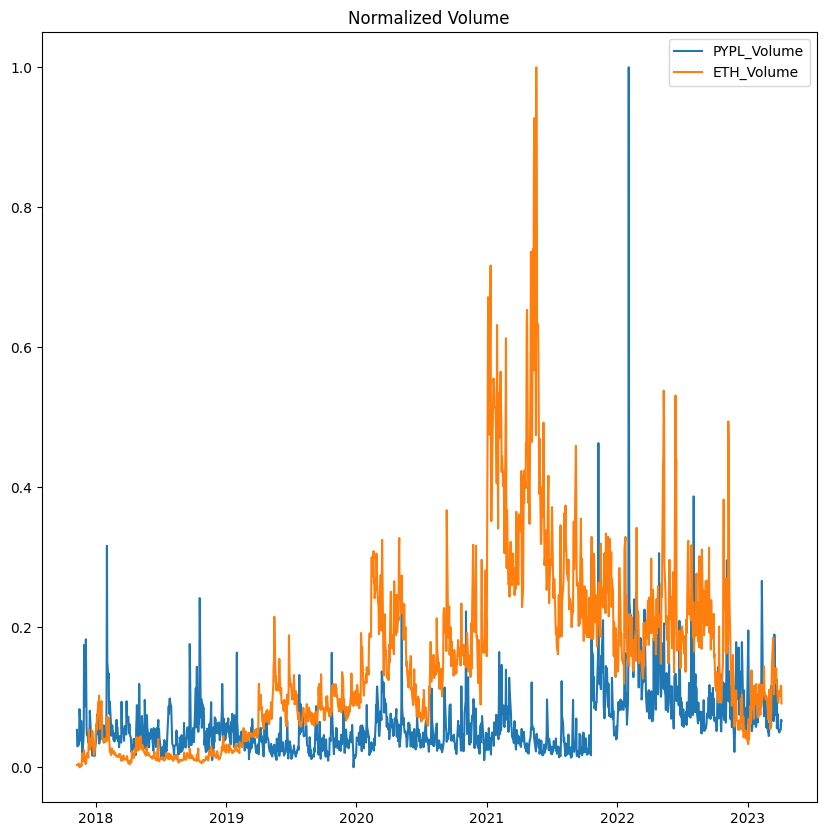

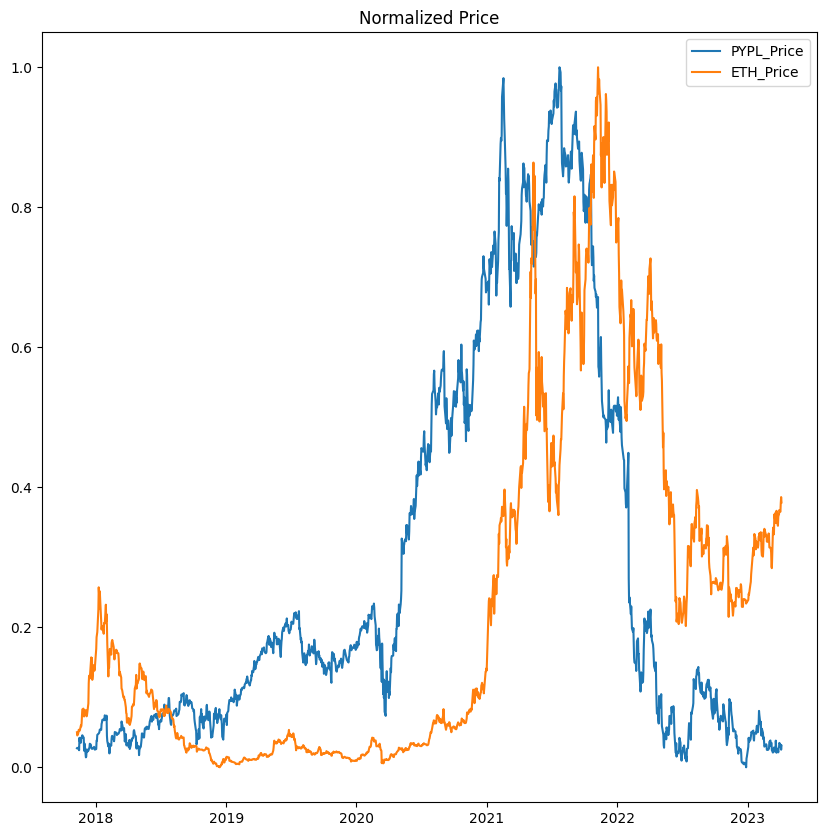

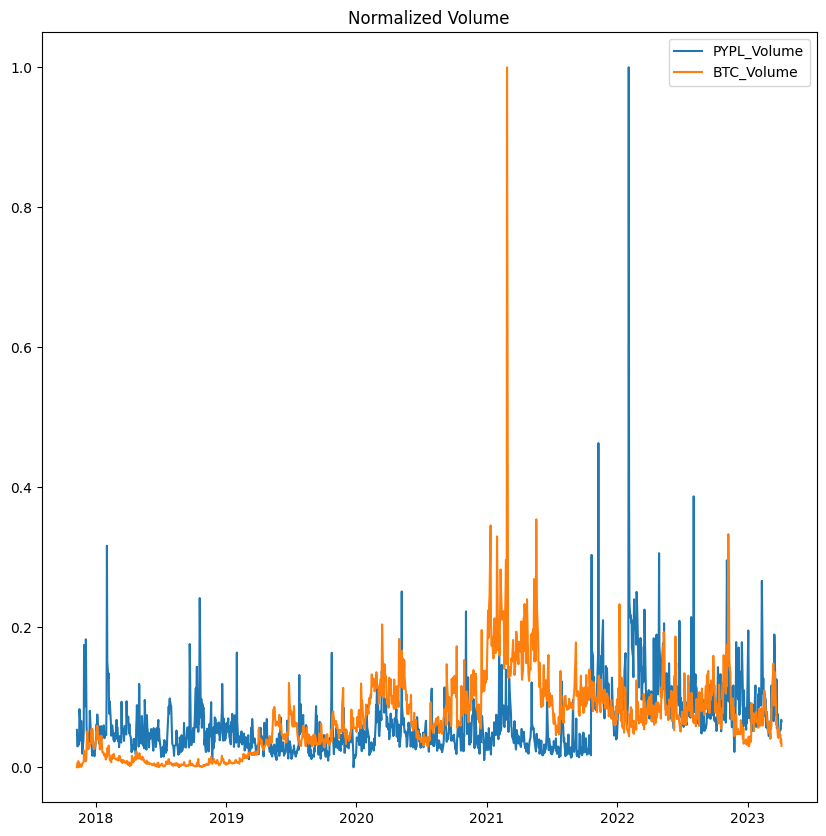

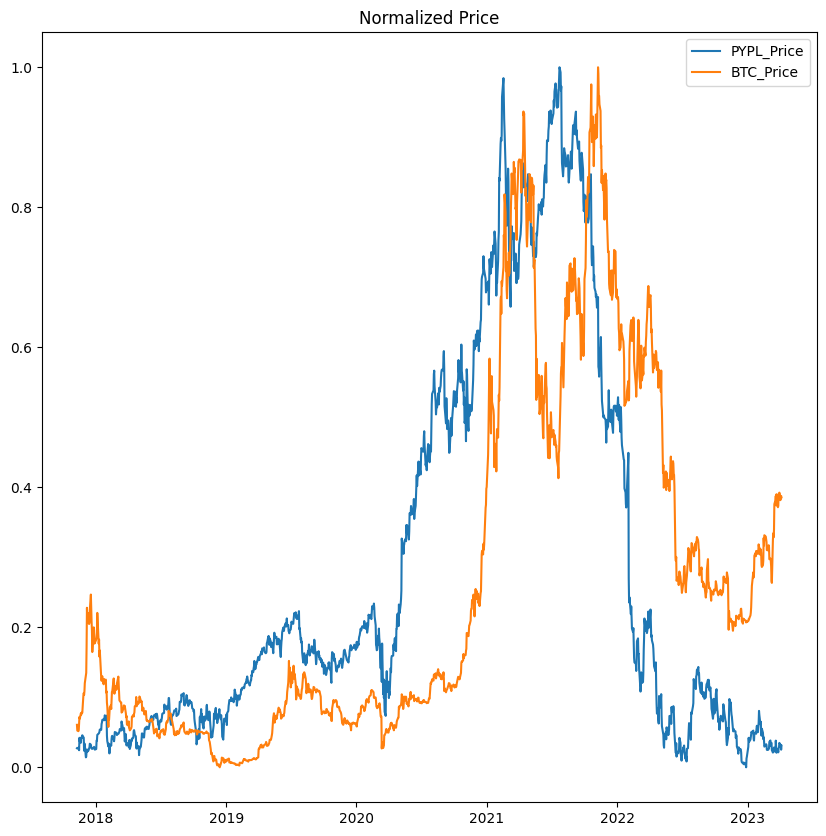

In [ ]:
#Get and plot volatitlty(standard-deviation) of each asset class
scaled_data_vol=scaler.fit_transform(mvol_df.set_index('date_time')[['PYPL_Volume', 'ETH_Volume']])
plt.figure(figsize=(10,10))
plt.plot( mvol_df['date_time'], scaled_data_vol[:], label = ['PYPL_Volume', 'ETH_Volume'])
plt.title("Normalized Volume")
plt.legend()
scaled_data_price = scaler.fit_transform(mstock_df.set_index('date_time')[['PYPL_Price', 'ETH_Price']])
plt.figure(figsize=(10,10))
plt.plot( mstock_df['date_time'], scaled_data_price[:], label = ['PYPL_Price', 'ETH_Price'])
plt.title("Normalized Price")
plt.legend()
scaled_data_vol=scaler.fit_transform(mvol_df.set_index('date_time')[['PYPL_Volume', 'BTC_Volume']])
plt.figure(figsize=(10,10))
plt.plot( mvol_df['date_time'], scaled_data_vol[:], label = ['PYPL_Volume', 'BTC_Volume'])
plt.title("Normalized Volume")
plt.legend()
scaled_data_price = scaler.fit_transform(mstock_df.set_index('date_time')[['PYPL_Price', 'BTC_Price']])
plt.figure(figsize=(10,10))
plt.plot( mstock_df['date_time'], scaled_data_price[:], label = ['PYPL_Price', 'BTC_Price'])
plt.title("Normalized Price")
plt.legend()
scaled_data_vol[:]

There does seem to be a lag as well, however it's not as apparent as it is with the previous comparison. We can not say for sure what is causing it, as there's a lot more factors that come into play that are outside the scope of this tutorial.

Now it's time to compare Bitcoin with the fintech ETF that we created all those lines of codes ago. We believe this is a fair comparison as Bitcoin is a protocol that aims to be P2P(Peer-to-Peer) and an alternative to the traditonal banking & financial institutions. Let's see what the results are!

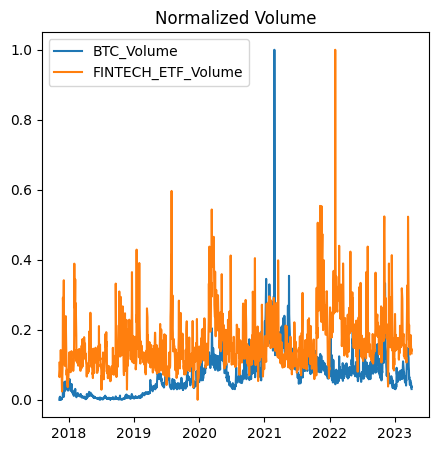

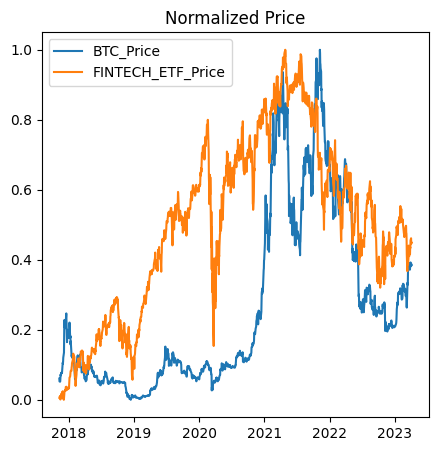

In [ ]:
#Get & plot correlation of both price and volume
scaled_data_vol=scaler.fit_transform(mvol_df.set_index('date_time')[['BTC_Volume', 'FINTECH_ETF_Volume']])
plt.figure(figsize=(5,5))
plt.plot( mvol_df['date_time'], scaled_data_vol[:], label = ['BTC_Volume', 'FINTECH_ETF_Volume'])
plt.title("Normalized Volume")
plt.legend()
scaled_data_price = scaler.fit_transform(mstock_df.set_index('date_time')[['BTC_Price', 'FINTECH_ETF_Price']])
plt.figure(figsize=(5,5))
plt.plot( mstock_df['date_time'], scaled_data_price[:], label = ['BTC_Price', 'FINTECH_ETF_Price'])
plt.title("Normalized Price")
plt.legend()

It appears that the fintech industry is no stranger to volatility in contradiction to what the mainstream media might say. Bitcoin even managed to surpass their average volume quite recently. Investors should keep this in mind while researching the risks in order to maintain the edge in this rapdily developing eco-system.

Now we will zoom in and see what specifcially happened pre & post pandemic. Did crypto actually get a leg up during COVID?

Our null hypothesis is simple. Covid helped crypto gain a leg up from their financial competitors.

# **Data Analysis**

In this section we will be analyzing the data in order to see if our initial assumption, the Null Hypothesis being true, is correct. We will be observing the correlations between Traditional and Cryptocurrency Before and After COVID, and then we use a ML Model to try and predict how they would act if COVID did not happen. This will help us somewhat understand how COVID impacted them, and whether it helped Cryptocurrency or not.

For this section we choose to normalize our data to observe trends rather than individual data.


In [ ]:
#split the data between pre-pandemic and post-pandemic
COVID_date = pd.Timestamp('2020-03-11')
pre_COVID_df = mstock_df[mstock_df['date_time'] < COVID_date]
pre_COVID_df.drop(['FIS_Price', 'FISV_Price', 'FLT_Price', 'GPN_Price', 'JKHY_Price'], axis = 1, inplace = True)
time = pre_COVID_df['date_time']
pre_COVID_df.drop(['date_time'], axis = 1, inplace = True)

<ipython-input-73-14c56a14258f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_COVID_df.drop(['FIS_Price', 'FISV_Price', 'FLT_Price', 'GPN_Price', 'JKHY_Price'], axis = 1, inplace = True)
<ipython-input-73-14c56a14258f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_COVID_df.drop(['date_time'], axis = 1, inplace = True)


<ipython-input-74-82999c4a0c3b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_COVID_df['date_time'] = time


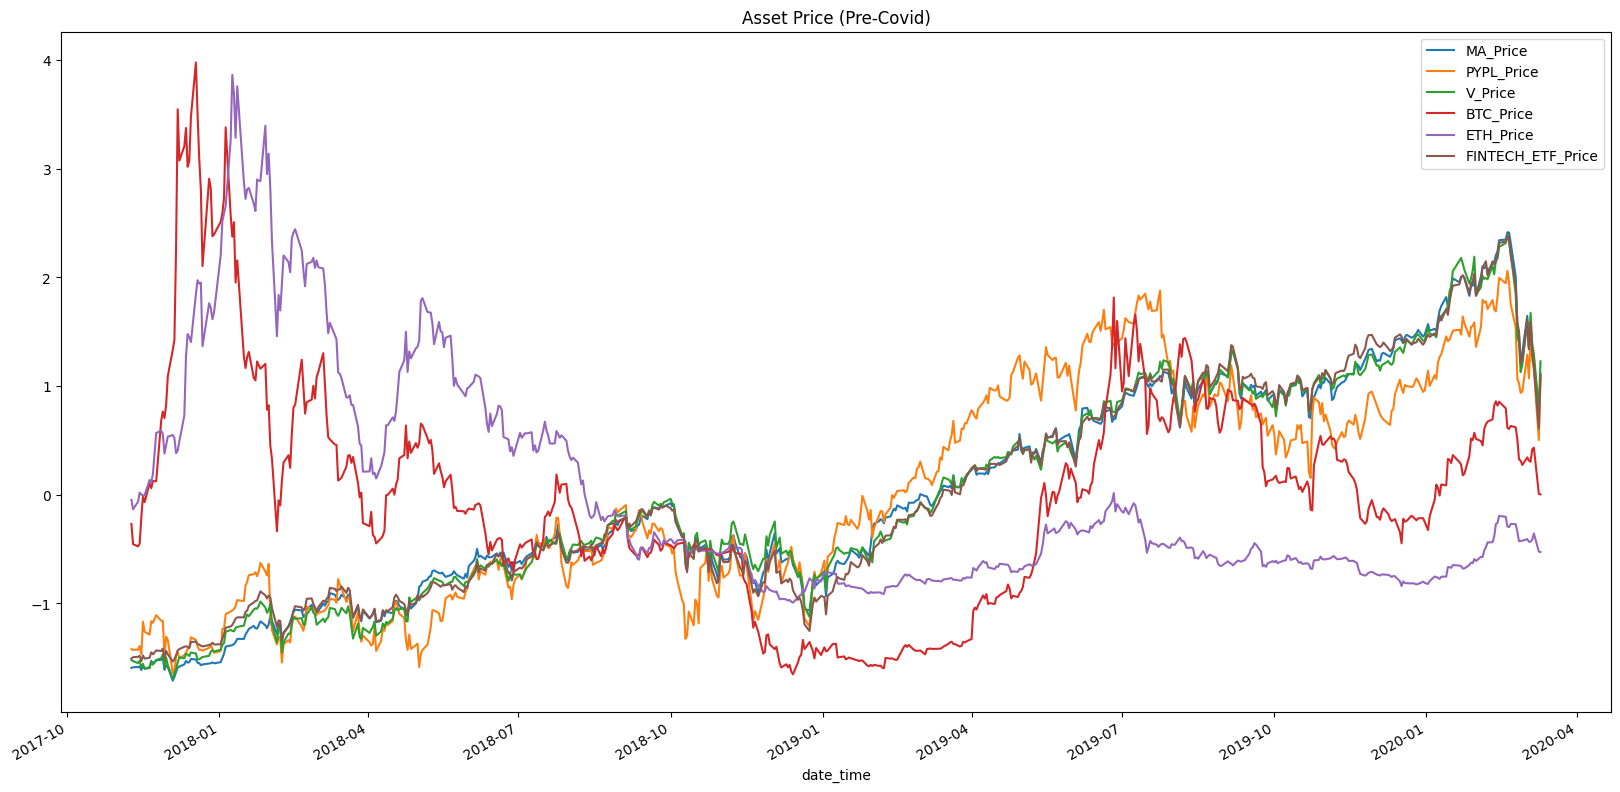

In [ ]:
norm_pre = (pre_COVID_df-pre_COVID_df.mean())/pre_COVID_df.std()
norm_pre['date_time'] = time
norm_pre.columns
norm_pre.plot(x = 'date_time', y= norm_pre.columns[:-1])
plt.title("Asset Price (Pre-Covid)")
pre_COVID_df['date_time'] = time

You see Bitcoin and Ethereum taking a tumble post 2017-2018 crypto-bubble. In early and mid 2019 there was hope that the crypto market would fully recover. According to investopedia rumors of heavy-handed government regulation made investors bearish, which amplified the even more bearish news of Covid some months later. More info by investopedia is available here: https://www.investopedia.com/why-is-bitcoin-price-dropping-5216985


In [ ]:
#split the data, this time for post-pandemic
COVID_date = pd.Timestamp('2020-03-11')
post_COVID_df = mstock_df[mstock_df['date_time'] > COVID_date]
post_COVID_df.drop(['FIS_Price', 'FISV_Price', 'FLT_Price', 'GPN_Price', 'JKHY_Price'], axis = 1, inplace = True)
time = post_COVID_df['date_time']
post_COVID_df.drop(['date_time'], axis = 1, inplace = True)
post_COVID_df.head()

<ipython-input-75-b15e6608eddb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_COVID_df.drop(['FIS_Price', 'FISV_Price', 'FLT_Price', 'GPN_Price', 'JKHY_Price'], axis = 1, inplace = True)
<ipython-input-75-b15e6608eddb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_COVID_df.drop(['date_time'], axis = 1, inplace = True)


,MA_Price,PYPL_Price,V_Price,BTC_Price,ETH_Price,FINTECH_ETF_Price
1180,237.199463,96.959999,156.862213,4970.788086,112.347122,152.160739
1181,265.201813,110.150002,172.295624,5563.707031,133.201813,166.933208
1182,231.453644,92.720001,148.954422,5014.479980,110.605873,144.200990
1183,233.643936,97.870003,154.716248,5225.629395,113.942749,150.747135
1184,223.871124,91.459999,145.495361,5238.438477,114.842270,140.710178


Text(0.5, 1.0, 'Normalized Asset Price (Post-Covid)')

<Figure size 2500x1000 with 0 Axes>

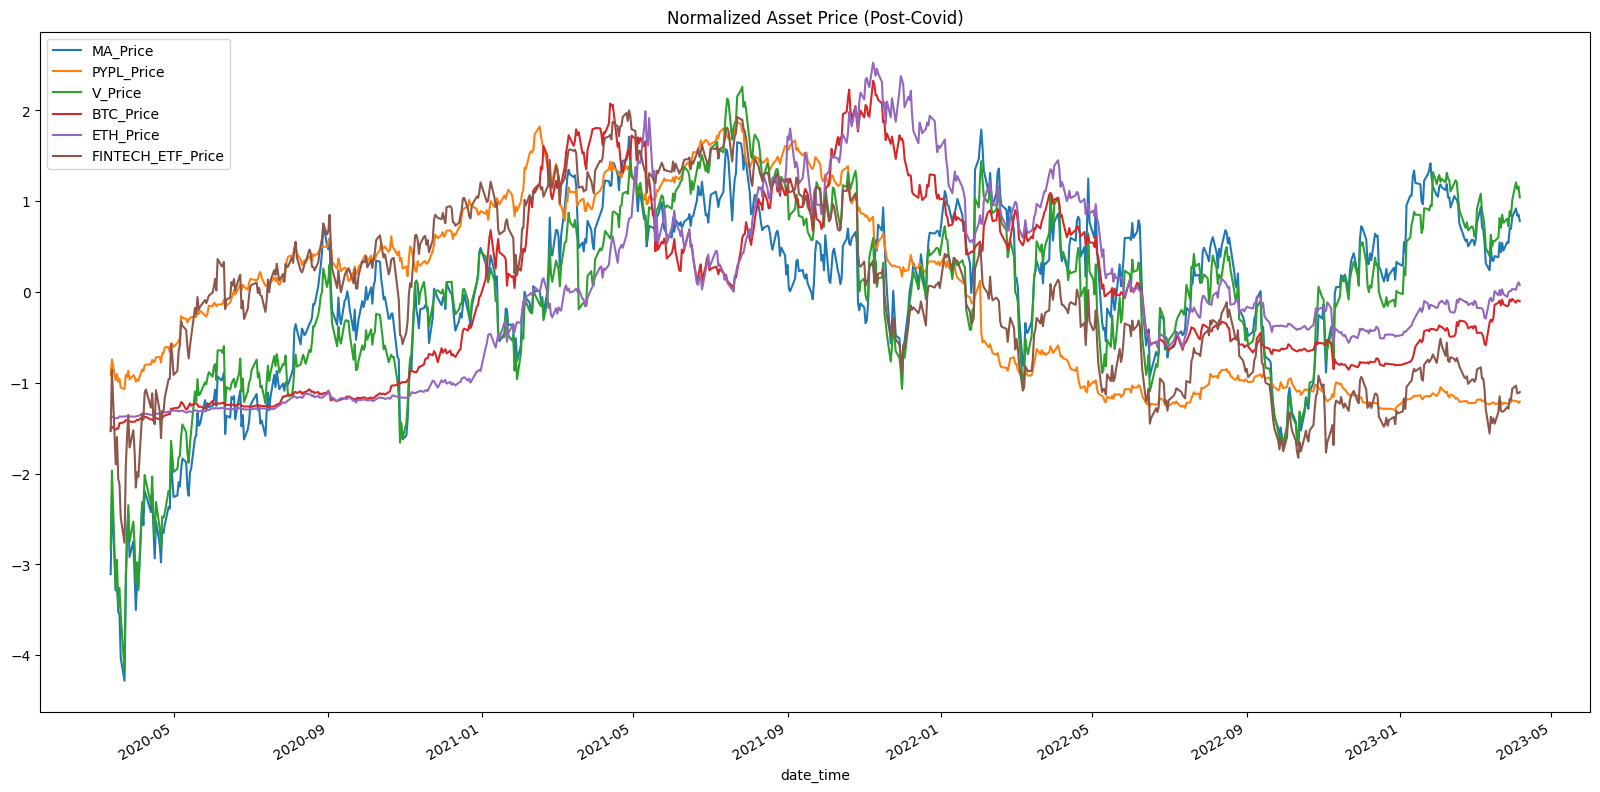

In [ ]:
norm_post = (post_COVID_df-post_COVID_df.mean())/post_COVID_df.std()
norm_post['date_time'] = time
norm_post.columns
plt.figure(figsize= (25,10))
norm_post.plot(x = 'date_time', y= norm_post.columns[:-1],figsize=(20, 10))
plt.title("Normalized Asset Price (Post-Covid)")

Post-Covid it seems that our crypto's have "blended in" more with their legacy counter-parts. However we claimed that covid should have boosted their performance. We assumed Factors such as more online investing apps, higher rates of e-commerce, and more should've pushed it. At the same time though events such as the historic FTX collapse also took place during this window, which undoubtedly hindered the crypto market. A timeline of FTX can be read [here](https://abcnews.go.com/Business/timeline-cryptocurrency-exchange-ftxs-historic-collapse/story?id=93337035
).

Machine Learning Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

Here we create a new dataset that only contains the Closing values of the bitcoin data along with the dates. This is to help isolate the data we will be using to train the model

In [ ]:
df = btc_df
df["Date"]=pd.to_datetime(df.date_time,format="%Y-%m-%d")
df.index=df['Date']


In [ ]:

data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

What we do here is to first create the training and validation datasets for the model later. This is done by putting the first 2000 data values into the training and the rest into the validation. This is to ensure the model is able to train on Pre-COVID data, so we can predict how the stock would look without COVID's influence.

We then also use a MinMax scalar to adjust all the values to be between 0 and 1. This allows the model to train more effiently

In [ ]:
x = 1800
scaler=MinMaxScaler(feature_range=(0,1))
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
final_dataset=new_dataset.values
train_data=final_dataset[0:x,:]
valid_data=final_dataset[x:,:]


scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

Here we split the data into the x and y components, with x being the previous 60 days of data, and y being the current days data. This makes sense since we are trying to predict the future using previous data

In [ ]:
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

Here we initialize the Model, the input and middle layers are LSTM layers, which are a type of recursive Neural Network which looks back on predictions to make future decisions. The final output layer is a Dense Layer

More information on this model can be found at: https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python/

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))  #Input Layer
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1)) # Output

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=1)

1740/1740 [==============================] - 53s 28ms/step - loss: 1.9132e-04


Here we make the predictions. We take in the predictions and feed it into the inputs of the next prediction to help build and extrapolate information into the future. We use a for loop and predict the next 200 datapoints using this method

In [ ]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-120:len(new_dataset)-len(valid_data)].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])

x_test_temp = X_test
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
prediction_arr = []



for i in range(0,200):
  X_test=np.array(x_test_temp)

  X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
  pred = predicted_closing_price=lstm_model.predict(X_test[i:i+1])
  prediction_arr.append(pred[0])
  np.append(inputs_data,[pred])
  X_test=[]

  for i in range(60,inputs_data.shape[0]):
    x_test_temp.append(inputs_data[i-60:i,0])

1/1 [==============================] - 0s 35ms/step


Before we can model, we have to untransform the data. Earlier we transformed the data to be between 0 and 1, so now we revert it to see the predictions

In [ ]:
predicted_closing_price=scaler.inverse_transform(prediction_arr)

This graphs the predictions, showing the actual(With COVID) and predicted(Without COVID)

<ipython-input-85-abb5f11ab7f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


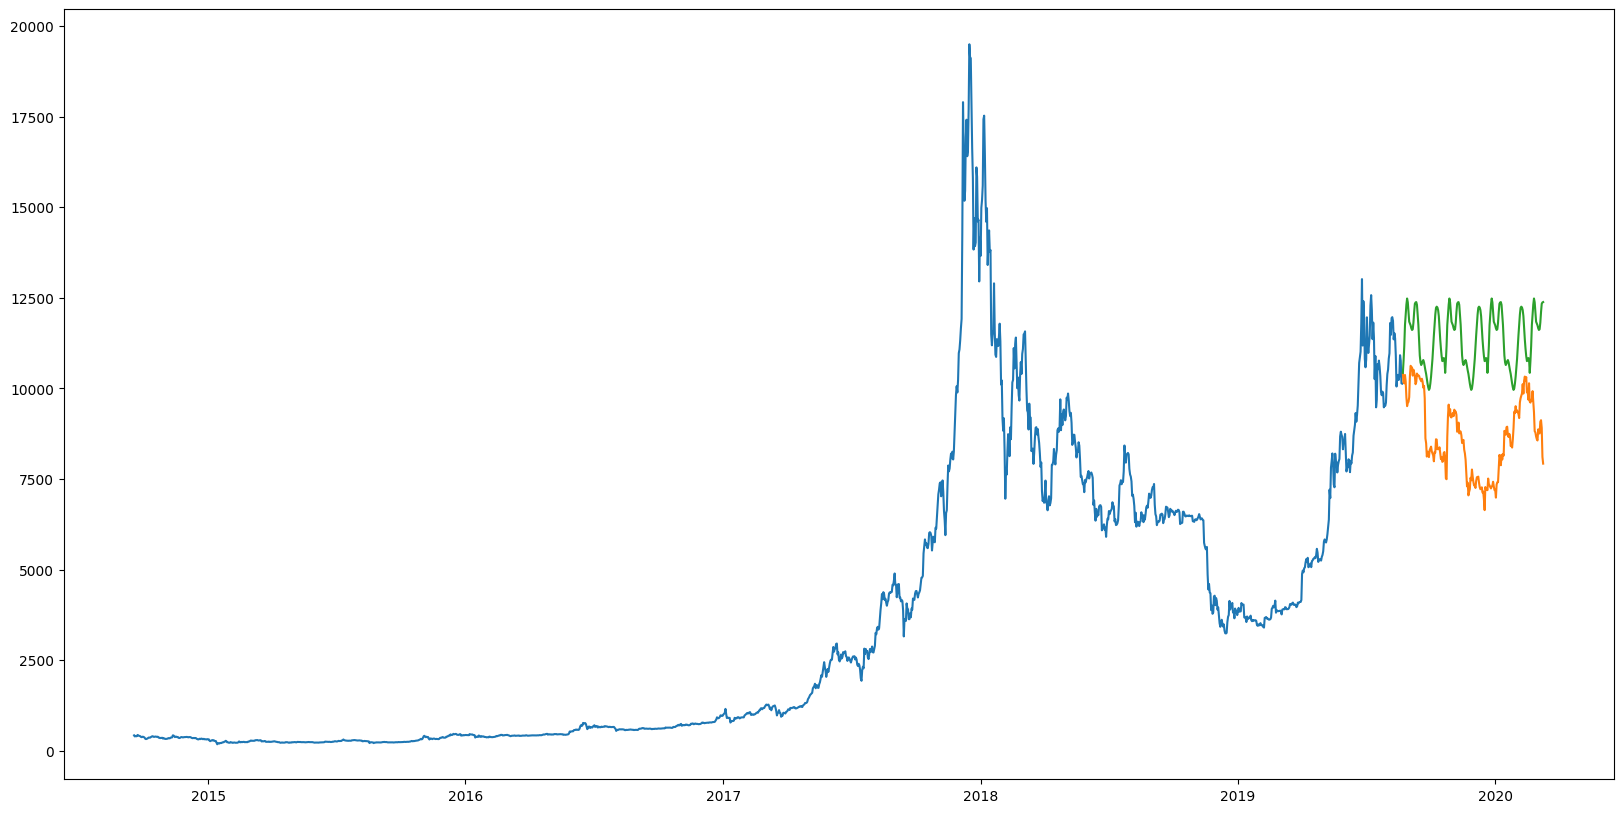

In [ ]:

train_data=new_dataset[:x]
valid_data=new_dataset[x:x+200]

valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[["Close","Predictions"]])

As shown here, we can observe the stabilized nature of the currency. This shows that, according to the model, Bitcoin would have been more stagnant in growth, rather than change very much.

We can also assume this means that COVID made the stock more volitile, especially with the stimulus checks received by more traditional Financial Tech companies, which had quite the growth as we will see later

We now repeat the above process for the ETF Averages

In [ ]:
df = mstock_saved
df["Date"]=pd.to_datetime(df.date_time,format="%Y-%m-%d")
df.index=df['Date']

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["FINTECH_ETF_Price"][i]

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["FINTECH_ETF_Price"][i]

x = 600
scaler=MinMaxScaler(feature_range=(0,1))
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
final_dataset=new_dataset.values
train_data=final_dataset[0:x,:]
valid_data=final_dataset[x:,:]


scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)



x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))  #Input Layer
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1)) # Output




lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=1)

540/540 [==============================] - 20s 31ms/step - loss: 0.0036


In [ ]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-6:700].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])

x_test_temp = X_test

X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

prediction_arr = []


for i in range(0,200):
  X_test=np.array(x_test_temp)

  X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
  pred = predicted_closing_price=lstm_model.predict(X_test[i:i+1])
  prediction_arr.append(pred[0])
  np.append(inputs_data,[pred])
  X_test=[]

  for i in range(60,inputs_data.shape[0]):
    x_test_temp.append(inputs_data[i-60:i,0])

1/1 [==============================] - 0s 24ms/step


In [ ]:
predicted_closing_price=scaler.inverse_transform(prediction_arr)

<ipython-input-122-2df31c089e63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


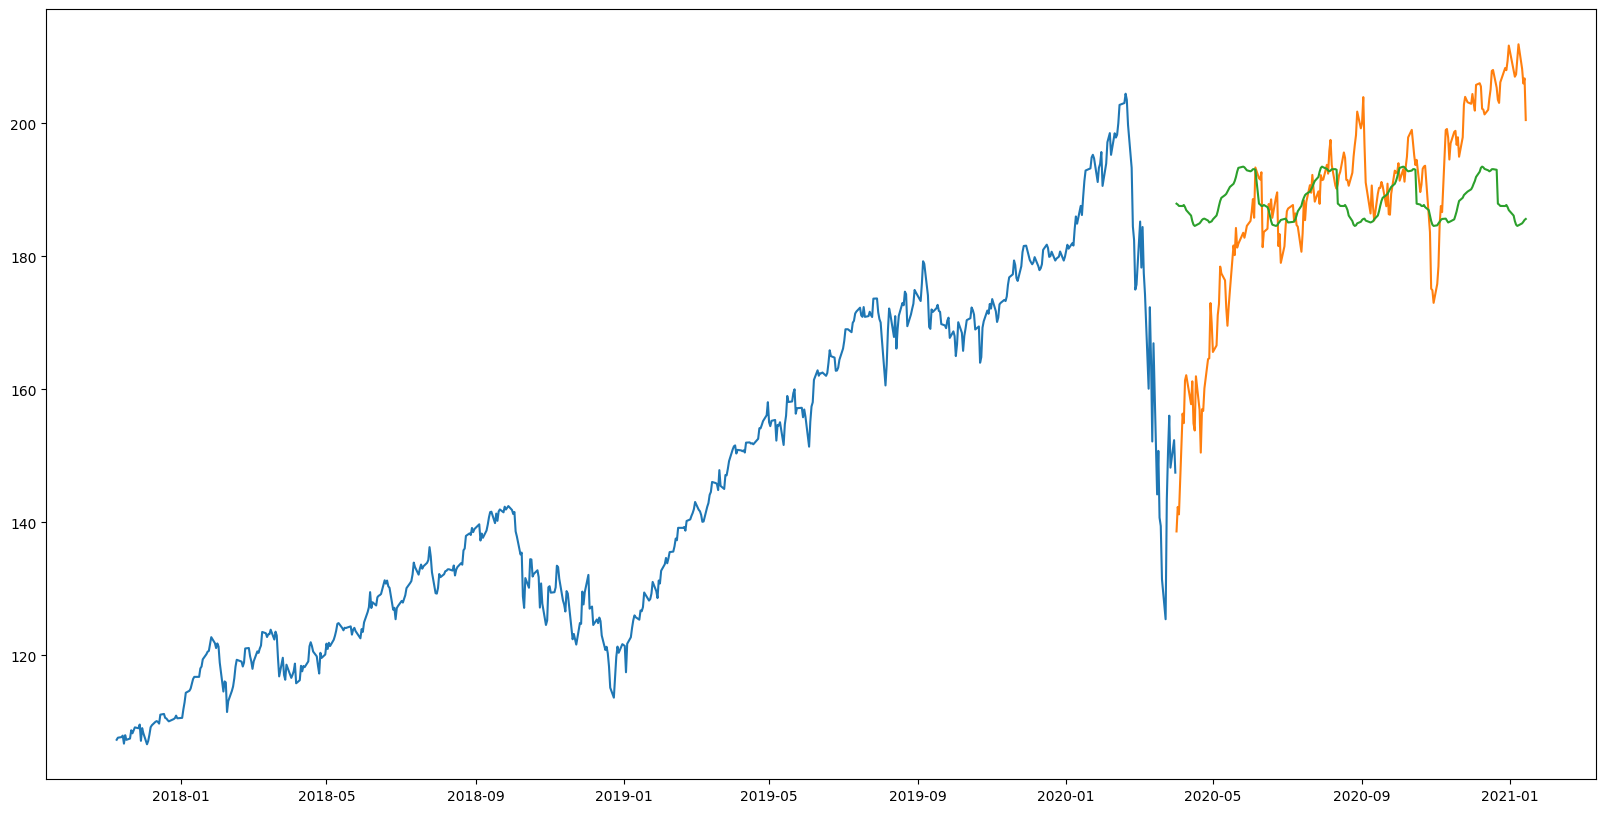

In [ ]:

train_data=new_dataset[:x]
valid_data=new_dataset[x:x+200]

valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[["Close", "Predictions"]])

As we can see, after the intial drop, it begins to stabilize and grow. The first drop can be attributed to people starting to worry over COVID, but as we can see, if we didn't have to go into Quarantine, the stock would have stabilized on its own and begin to slowly recover.

This is in contrast to the effects of COVID, since it started to grow rapidly after the initial drop. We can observe this as a result of the Stimulus many large companies received during COVID, amongst them being the Financial Tech companies studied here. We can see the other companies that received bailouts in 2020 https://projects.propublica.org/bailout/list

As we can observe, the models are not the most accurate. Regardless, they can give us at least some semblance of how these Stocks would react without COVID. More Advanced Models for this behavior are beyond the scope of this tutorial.

### **Conclusions**

In conclusion, there were other nonquantifiable factors that contributed to us accepting a false-positive. We saw in the graphs that COVID did not really help popularize cryptocurrencies over its lifetime, it did increase, but not to a degree to dethrone more traditional means of finance.

The rippling of the economy coupled with mismanaged exchanges had a part to play in curbing crypto-currencies from the growth that we and many other people in the financial space were hoping to see. All of this was outside the scope this tutorial and very difficult to quantify.

Taking a look at other fintech stocks outside of the S&P500. It's goo to note that  a lot of fintech companies are also start-ups or private one example being Stripe. Finding a way to incorporate other financial information such as crypto & traditional transactions that could help study the actual consumer side of the trends. We can also branch out to the banking sector, as influencers such as Andre Autonompolous & Ivan on Tech constantly re-iterate how Bitcoin was the response to the 2008-2009 financial crisis and poor banking practices. Links to their youtube channels are here:

https://www.youtube.com/@IvanOnTech

https://www.youtube.com/@aantonop

Techniques that were shown in this tutorial to you today while powerful, still cannot fully account for things that happen within society and how that can effect the markets.